In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')
X=dataset.iloc[:,[3,4]].values

In [3]:
dataset.head() ## here we can exclude id genre and age because it not relevant for clustering 
#we dont need to split our data here

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## using elbow method to find the optimal number of clusters


In [4]:
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i , init='k-means++' , random_state=40)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


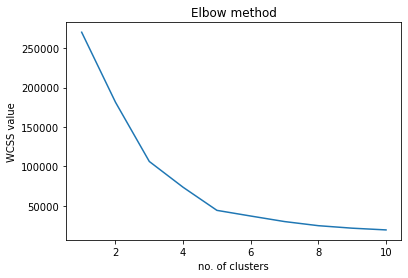

In [5]:
plt.plot(range(1,11),WCSS)
plt.title('Elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS value')
plt.show()

In [6]:
## at number 5 the curves decreses slowly so optimal of cluster is 5

## training the k means model

In [7]:
kmeans=KMeans(n_clusters=5 , init='k-means++' , random_state=40)
y_kmeans=kmeans.fit_predict(X)

In [8]:
print(y_kmeans)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


## visualising the model


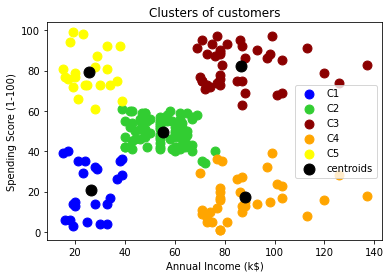

In [9]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=80,c='blue',label="C1")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=80,c='limegreen',label="C2")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=80,c='darkred',label="C3")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=80,c='orange',label="C4")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=80,c='yellow',label="C5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=120,c='black',label='centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()